<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/ML_Ejercicio_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ANSUR II FEMALE Public.csv')

In [ ]:
df.shape

(1986, 108)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 104 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(98), object(6)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,...,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,22306.606244,229.651057,1335.095166,311.198389,215.739678,1239.029708,228.110272,182.05136,365.348943,305.578550,...,355.136455,980.149043,677.582075,154.792548,794.190332,35.072004,1.781470,28.943605,64.601712,147.505035
std,20904.730297,31.464691,58.079885,17.164691,14.891757,55.801958,11.771007,9.64192,18.298851,30.757033,...,23.945046,50.022715,109.846458,7.827695,38.194755,955.582848,0.999536,8.332078,2.801938,22.855371
min,10037.000000,155.000000,1115.000000,249.000000,170.000000,1038.000000,194.000000,151.00000,283.000000,216.000000,...,289.000000,805.000000,358.000000,124.000000,672.000000,1.000000,1.000000,17.000000,56.000000,86.000000
25%,17667.000000,207.000000,1298.000000,300.000000,205.000000,1202.000000,220.000000,175.00000,353.000000,285.000000,...,338.000000,947.000000,601.000000,150.000000,769.000000,1.000000,1.000000,22.000000,63.000000,130.000000
50%,22096.500000,227.000000,1332.000000,311.000000,215.000000,1236.000000,227.000000,182.00000,365.000000,304.000000,...,355.000000,977.500000,668.000000,154.000000,794.000000,2.000000,2.000000,27.000000,64.000000,145.000000
75%,26089.750000,249.000000,1374.000000,323.000000,225.000000,1277.000000,236.000000,188.00000,378.000000,324.000000,...,370.000000,1013.000000,745.750000,160.000000,819.000000,3.000000,2.000000,34.000000,66.000000,161.000000
max,920103.000000,358.000000,1536.000000,371.000000,275.000000,1419.000000,270.000000,216.00000,422.000000,435.000000,...,432.000000,1142.000000,1196.000000,183.000000,941.000000,42351.000000,6.000000,58.000000,80.000000,270.000000


In [ ]:
# vemos que no hay nulos
df.isnull().sum().sort_values()

SubjectId                            0
tenthribheight                       0
suprasternaleheight                  0
stature                              0
span                                 0
                                  ... 
crotchlengthposterioromphalion       0
crotchlengthomphalion                0
forearmforearmbreadth                0
WritingPreference                    0
Ethnicity                         1467
Length: 108, dtype: int64

In [ ]:
df.drop( columns=['Gender','Date','SubjectId','Ethnicity'], inplace=True, axis=1 )
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,...,Regular Army,Combat Support,92Y,Germany,2,2,26,61,142,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,...,Regular Army,Combat Service Support,25U,California,3,3,21,64,120,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,...,Regular Army,Combat Service Support,35D,Texas,1,1,23,68,147,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,...,Regular Army,Combat Service Support,25U,District of Columbia,8,2,22,66,175,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,...,Regular Army,Combat Arms,42A,Texas,1,1,45,63,195,Right hand


In [ ]:
df.shape

(1986, 104)

In [ ]:
catCol = df.select_dtypes(include=['category','object']).columns.to_list()

numCol = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

In [ ]:
data = df.drop(catCol, axis = 1)

In [ ]:
data.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,231,1282,301,204,1180,222,177,373,315,263,...,345,942,657,152,756,2,2,26,61,142
1,194,1379,320,207,1292,225,178,372,272,250,...,329,1032,534,155,815,3,3,21,64,120
2,183,1369,329,233,1271,237,196,397,300,276,...,367,1035,663,162,799,1,1,23,68,147
3,261,1356,306,214,1250,240,188,384,364,276,...,371,999,782,173,818,8,2,22,66,175
4,309,1303,308,214,1210,217,182,378,320,336,...,380,911,886,152,762,1,1,45,63,195


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_df = scaler.fit_transform(data)

In [ ]:
std_df.shape

(1986, 98)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(std_df).shape

(1986, 98)

In [ ]:
pca.explained_variance_ratio_

array([4.33930871e-01, 1.43297871e-01, 5.04492562e-02, 3.67410161e-02,
       2.73268257e-02, 2.22060120e-02, 1.88991405e-02, 1.58365434e-02,
       1.48635946e-02, 1.31619796e-02, 1.22058823e-02, 1.10709520e-02,
       1.04233840e-02, 9.97906226e-03, 9.08673142e-03, 8.73662300e-03,
       8.29369853e-03, 8.07514812e-03, 7.63286565e-03, 7.09773043e-03,
       7.00606488e-03, 6.40275196e-03, 6.07615372e-03, 5.96371003e-03,
       5.74547383e-03, 5.24852491e-03, 4.84686436e-03, 4.40993589e-03,
       4.31997454e-03, 4.10826822e-03, 3.72926022e-03, 3.52821345e-03,
       3.50532661e-03, 3.28506864e-03, 3.16875864e-03, 2.90364576e-03,
       2.79397313e-03, 2.68822586e-03, 2.61956007e-03, 2.47657635e-03,
       2.26590857e-03, 2.11811669e-03, 2.03763698e-03, 1.90034083e-03,
       1.79258690e-03, 1.71273646e-03, 1.67872712e-03, 1.64299053e-03,
       1.55479776e-03, 1.50774659e-03, 1.41642809e-03, 1.38353651e-03,
       1.30791972e-03, 1.24577581e-03, 1.22330242e-03, 1.19867100e-03,
      

In [ ]:
# Con las primeras 5 componentes tenemos el 75%
# Esto no quiere decir que haya una variable que me explique esa varianza
# es un cambio en el espacio
pca.explained_variance_ratio_.cumsum()

array([0.43393087, 0.57722874, 0.627678  , 0.66441901, 0.69174584,
       0.71395185, 0.73285099, 0.74868754, 0.76355113, 0.77671311,
       0.78891899, 0.79998994, 0.81041333, 0.82039239, 0.82947912,
       0.83821574, 0.84650944, 0.85458459, 0.86221746, 0.86931519,
       0.87632125, 0.882724  , 0.88880016, 0.89476387, 0.90050934,
       0.90575787, 0.91060473, 0.91501467, 0.91933464, 0.92344291,
       0.92717217, 0.93070038, 0.93420571, 0.93749078, 0.94065954,
       0.94356318, 0.94635716, 0.94904538, 0.95166494, 0.95414152,
       0.95640743, 0.95852554, 0.96056318, 0.96246352, 0.96425611,
       0.96596885, 0.96764757, 0.96929056, 0.97084536, 0.97235311,
       0.97376954, 0.97515307, 0.97646099, 0.97770677, 0.97893007,
       0.98012874, 0.98124524, 0.98233474, 0.98335481, 0.98433952,
       0.98528393, 0.98616963, 0.98702695, 0.98786351, 0.98867938,
       0.98939003, 0.99009392, 0.99078767, 0.99143132, 0.99203537,
       0.99262291, 0.99317724, 0.99370308, 0.9941964 , 0.99466

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Son com los pasos
pipe = Pipeline( [
                  ( 'scaler',StandardScaler() ),
                  ('reducer', PCA(n_components=8)),
                  ('classifier',RandomForestClassifier()),

] )

In [ ]:
pipe['reducer']

PCA(n_components=8)

In [ ]:
pipe['classifier']

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
# La variable writing esta muy debalanceada, entonces al intentar predecirla adivinara que escriben con la derecha
X_train, X_test, y_train, y_test = train_test_split(data, df['WritingPreference'], test_size=0.2,random_state=42)

In [ ]:
# se hacen los pasos
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reducer', PCA(n_components=8)),
                ('classifier', RandomForestClassifier())])

In [ ]:
pipe['reducer'].explained_variance_ratio_.sum()

0.7495325752660231

In [ ]:
pipe.score(X_test,y_test)

0.8869346733668342

In [ ]:
pipe['reducer'].fit_transform(data)

array([[ -35.70565569,  150.24133813,   85.72322894, ...,   30.02388369,
          -4.64436793,   28.34742608],
       [ -36.5119576 ,   71.67200195, -401.39758666, ...,    3.99626186,
          -2.29287136,  -26.79529389],
       [ -34.0028023 ,  -97.22946827, -273.27218749, ...,  131.01733264,
         -32.38109495,   17.03965013],
       ...,
       [ -28.17732699, -193.61628763,  124.7289257 , ...,   12.21254691,
          20.87126764,  -16.3184136 ],
       [ -34.67433997,  147.7894959 ,   44.88266167, ...,   -1.00366892,
         -50.17646322,    5.31077911],
       [ -33.91610119,   43.91960541,  -83.22264852, ...,  -12.48828233,
        -115.46228934,   18.50659456]])

In [ ]:
cp = pipe['reducer'].fit_transform(data)

In [ ]:
cp = cp[:,:2]

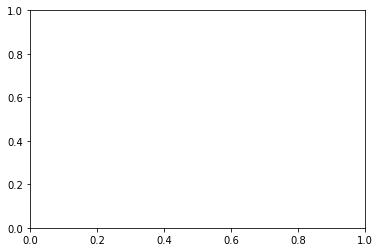

In [ ]:
sns.scatterplot()